# Melbourne Housing Prices

**Dataset:** Melbourne housing clearance data from Jan 2016

**Source:** https://www.kaggle.com/anthonypino/melbourne-housing-market

1. Using this Kaggle data create a model to predict a house's value. 
2. We want to be able to understand what creates value in a house, as though we were a real estate developer.

### Table of Contents

- 1.0. Importing and Exploring Data
 - 1.1. Identifying Null Values
 - 1.2. Identifying Data Types
 - 1.3. Abbreviating Region Names
 - 1.4. Data Exploration
 - 1.5. Visualizing Correlation with Price
 - 1.6. Heat Map
 - 1.7. Histogram Visualizations
 - 1.8. Boxplot Visualizations
- 2.0. Creating Dummy Variables
 - 2.1. Creating Dummies 
 - 2.2. Preprocessing and Train Test Split
- 3.0. Machine Learning Models for Predicting Price
 - 3.1. Random Forest
  - 3.1.a. Importing SelectFromModel and setting up threshold
  - 3.1.b. Transforming Features
  - 3.1.c. Creating a new RandomForestRegressor based on transformed features
- 4.0. Random Forest Accuracy Comparison
 - 4.1. Regular Features
 - 4.2. Selected Features
- 5.0. Linear Regression with Limited Features
 - 5.1. Linear Regression Accuracy
 - 5.2. Coefficent Values
 - 5.3. Scatter Plot Actual Vs. Predicted Values

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

###  1.0. Importing and Exploring Data

In [2]:
housing = pd.read_csv('C:/Users/ushai/Dropbox/Data Science/Datasets/melbourne-housing-market/Melbourne_housing_FULL.csv')

In [3]:
housing.shape

(34857, 21)

In [4]:
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

###  1.1. Identifying Null Values 

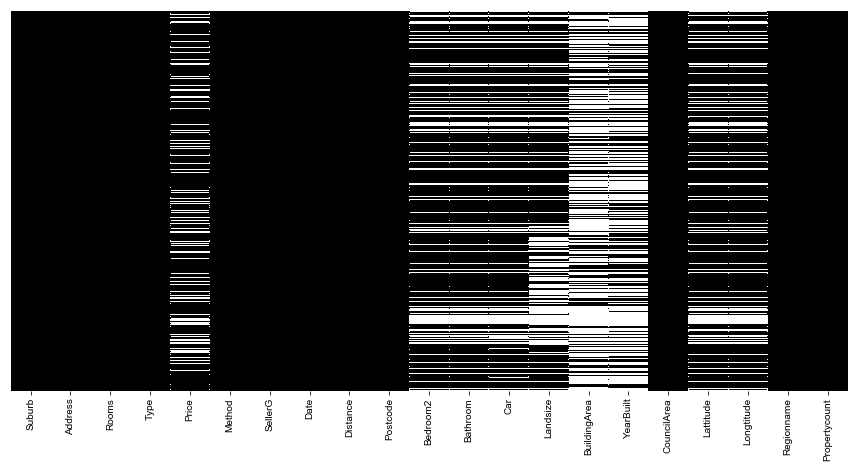

In [6]:
# Identifying null values
housing.isnull().sum()

# Percentage of null values
p = housing.isnull().sum()/ len(housing)*100
pd.Series.sort_values(p, ascending=False)

# Visualize missing values
plt.subplots(figsize=(15,7))
sns.set(font_scale=1)
sns.heatmap(housing.isnull(),yticklabels = False, cbar = False, cmap = 'Greys_r', label='')
plt.show()

In [7]:
housing.shape

(34857, 21)

In [8]:
# Dropping all null values
housing = housing.dropna().reset_index(drop = True)

In [9]:
housing.shape

(8887, 21)

###  1.2. Identifying Data Types 

In [10]:
# Converting 'Date' column to 'year','month','day'
housing['Date'] = pd.to_datetime(housing['Date'])
housing['year'], housing['month'], housing['day'] = housing['Date'].dt.year, housing['Date'].dt.month, housing['Date'].dt.day

# Changing 'year', month', 'day' to object so we can create dummy variables if needed.
housing['year']= housing.year.astype(object)
housing['day']= housing.day.astype(object)
housing['month']= housing.month.astype(object)

# Removing full stop from the 'Postcode' column
housing['Postcode'] = housing['Postcode'].astype(str)
housing['Postcode'] = housing['Postcode'].str.replace('.', '')

# Changing back the 'Postcode' column back to object
housing['Postcode'] = housing['Postcode'].astype('object')

# Changing floats to integers where required
Integers = ['Rooms','Bedroom2','Bathroom', 'Car', 'YearBuilt','Landsize', 'Propertycount', 'BuildingArea']

for column in Integers:
    housing[Integers] = housing[Integers].astype(int)

# Getting a list of all the objects
categorical = housing.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print((i),(':'),(column.nunique()))

Suburb : 315
Address : 8764
Type : 3
Method : 5
SellerG : 250
Postcode : 194
CouncilArea : 33
Regionname : 8
year : 3
month : 12
day : 30


In [11]:
# Creating a list of all the floats
categorical = housing.select_dtypes(include=['float'])
for i in categorical:
    column = categorical[i]
    print((i))
    print(column.nunique())

Price
1846
Distance
201
Lattitude
5661
Longtitude
6070


In [12]:
# Verifying all dtypes
housing.dtypes

Suburb                   object
Address                  object
Rooms                     int32
Type                     object
Price                   float64
Method                   object
SellerG                  object
Date             datetime64[ns]
Distance                float64
Postcode                 object
Bedroom2                  int32
Bathroom                  int32
Car                       int32
Landsize                  int32
BuildingArea              int32
YearBuilt                 int32
CouncilArea              object
Lattitude               float64
Longtitude              float64
Regionname               object
Propertycount             int32
year                     object
month                    object
day                      object
dtype: object

###  1.3. Abbreviating Region Names 

In [13]:
housing.Regionname.value_counts()

Southern Metropolitan         2707
Northern Metropolitan         2612
Western Metropolitan          2059
Eastern Metropolitan           982
South-Eastern Metropolitan     371
Northern Victoria               62
Eastern Victoria                51
Western Victoria                43
Name: Regionname, dtype: int64

In [14]:
# Abbreviate Regionname categories
housing['Regionname'] = housing['Regionname'].map({'Northern Metropolitan':'N Metro',
                                            'Western Metropolitan':'W Metro', 
                                            'Southern Metropolitan':'S Metro', 
                                            'Eastern Metropolitan':'E Metro', 
                                            'South-Eastern Metropolitan':'SE Metro', 
                                            'Northern Victoria':'N Vic',
                                            'Eastern Victoria':'E Vic',
                                            'Western Victoria':'W Vic'})

In [15]:
housing.to_csv('housing_clean_ml.csv', index=False)

###  1.4. Data Exploration 

In [16]:
housing.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,8887.000000,8.887000e+03,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000
mean,3.098909,1.092902e+06,11.199887,3.078204,1.646450,1.692247,523.480365,149.301339,1965.753348,-37.804501,144.991393,7475.940137
std,0.963786,6.793819e+05,6.813402,0.966269,0.721611,0.975464,1061.324228,87.926718,37.040876,0.090549,0.118919,4375.024364
min,1.000000,1.310000e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.174360,144.423790,249.000000
25%,2.000000,6.410000e+05,6.400000,2.000000,1.000000,1.000000,212.000000,100.000000,1945.000000,-37.858560,144.920000,4382.500000
50%,3.000000,9.000000e+05,10.200000,3.000000,2.000000,2.000000,478.000000,132.000000,1970.000000,-37.798700,144.998500,6567.000000
75%,4.000000,1.345000e+06,13.900000,4.000000,2.000000,2.000000,652.000000,180.000000,2000.000000,-37.748945,145.064560,10331.000000
max,12.000000,9.000000e+06,47.400000,12.000000,9.000000,10.000000,42800.000000,3112.000000,2019.000000,-37.407200,145.526350,21650.000000


In [17]:
housing[['Propertycount']].mean() 

Propertycount    7475.940137
dtype: float64

In [18]:
# Data exploration using mean values for 'Regions' using pandas Groupby
Z = housing.groupby('Regionname').mean().reset_index()

In [19]:
Z

,Regionname,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,E Metro,3.495927,1.157120e+06,14.711609,3.486762,1.857434,1.904277,659.467413,173.430754,1972.599796,-37.794489,145.143813,6062.042770
1,E Vic,3.470588,6.618428e+05,35.292157,3.470588,1.725490,1.921569,990.490196,170.764706,1983.627451,-37.974168,145.326458,9216.058824
2,N Metro,2.892420,8.778521e+05,9.391424,2.878637,1.471286,1.544028,445.184916,128.119066,1964.372129,-37.733861,144.980604,9315.810490
3,N Vic,3.467742,5.990403e+05,32.516129,3.467742,1.838710,2.145161,2669.354839,164.774194,1992.693548,-37.603580,144.859854,4724.741935
4,S Metro,3.039158,1.493323e+06,8.918877,3.007388,1.746214,1.635020,493.237532,159.347248,1958.706317,-37.868548,145.035930,7482.845586
5,SE Metro,3.433962,9.227159e+05,25.041509,3.428571,1.716981,2.037736,618.237197,159.576819,1976.929919,-38.005688,145.146726,6915.110512
6,W Metro,3.158329,8.783672e+05,10.678485,3.133560,1.619718,1.764449,500.264206,148.942205,1969.945119,-37.782565,144.850289,6016.701311
7,W Vic,3.627907,4.458023e+05,30.686047,3.627907,1.488372,2.093023,723.976744,133.302326,1979.744186,-37.695156,144.570897,4184.813953


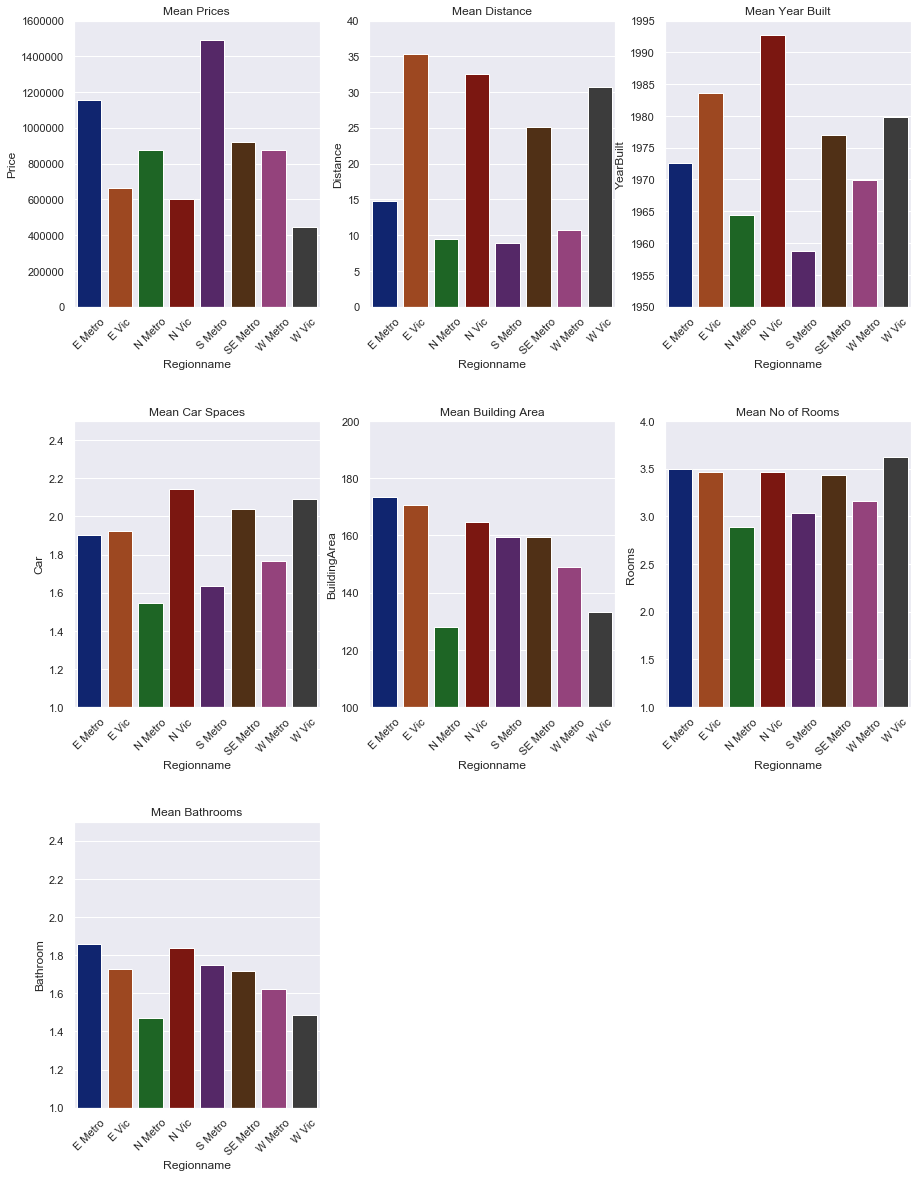

In [20]:
# plotting mean values for different regions
sns.set(style="darkgrid")

plt.figure(figsize=(15,20))

plt.subplot(3,3,1)
sns.barplot(x= 'Regionname', y='Price', data=Z, palette='dark')
plt.ylim(0, 1600000)
plt.xticks(rotation=45)
plt.title('Mean Prices',fontsize=12)

# plotting mean year of built for different regions
plt.subplot(3,3,2)
sns.barplot(x= 'Regionname', y='Distance', data=Z, palette='dark')
plt.ylim(0, 40)
plt.xticks(rotation=45)
plt.title('Mean Distance',fontsize=12)

# plotting mean year of built for different regions
plt.subplot(3,3,3)
sns.barplot(x= 'Regionname', y='YearBuilt', data=Z, palette='dark')
plt.ylim(1950,1995)
plt.xticks(rotation=45)
plt.title('Mean Year Built',fontsize=12)

# plotting mean car spaces for different regions
plt.subplot(3,3,4)
sns.barplot(x= 'Regionname', y='Car', data=Z, palette='dark')
plt.ylim(1,2.5)
plt.xticks(rotation=45)
plt.title('Mean Car Spaces',fontsize=12)

# plotting mean building area for different regions
plt.subplot(3,3,5)
sns.barplot(x= 'Regionname', y='BuildingArea', data=Z, palette='dark')
plt.ylim(100,200)
plt.xticks(rotation=45)
plt.title('Mean Building Area',fontsize=12)

# plotting mean building area for different regions
plt.subplot(3,3,6)
sns.barplot(x= 'Regionname', y='Rooms', data=Z, palette='dark')
plt.ylim(1,4)
plt.xticks(rotation=45)
plt.title('Mean No of Rooms',fontsize=12)

# plotting mean building area for different regions
plt.subplot(3,3,7)
sns.barplot(x= 'Regionname', y='Bathroom', data=Z, palette='dark')
plt.ylim(1,2.5)
plt.xticks(rotation=45)
plt.title('Mean Bathrooms',fontsize=12)

plt.subplots_adjust(wspace=0.2)
plt.subplots_adjust(hspace=0.4)

plt.show()

###  1.5. Visualizing Correlation with Price

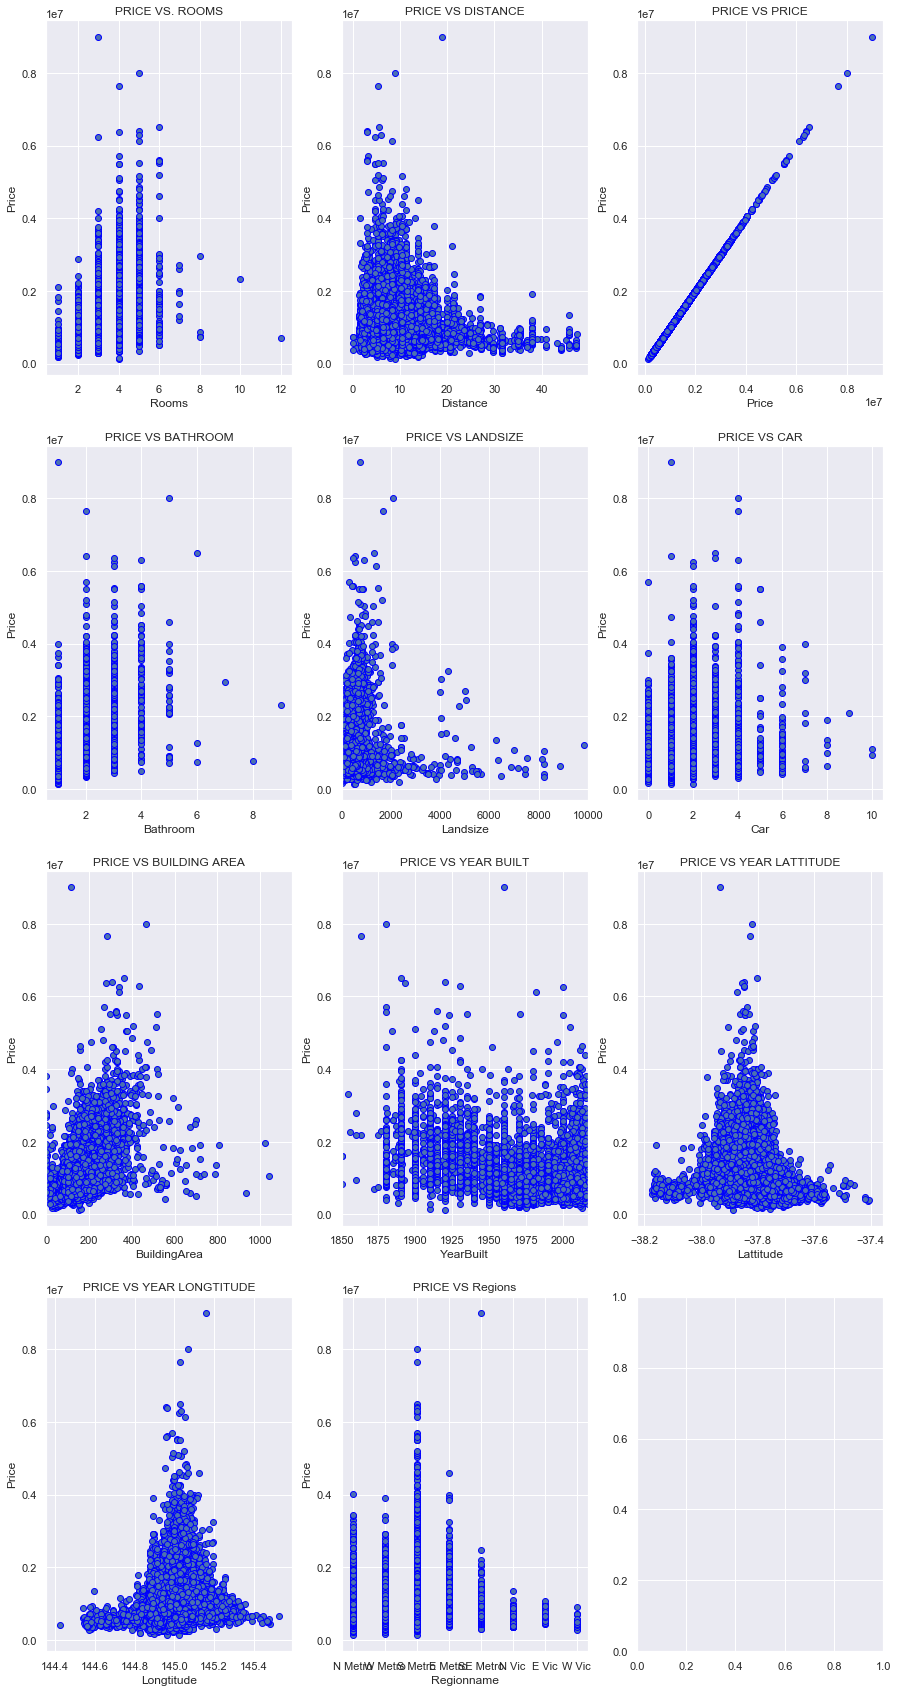

In [21]:
sns.set_style('darkgrid')
f, axes = plt.subplots(4,3, figsize = (15,30))

# axes[0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = housing, edgecolor = 'blue')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('PRICE VS. ROOMS')

# axes[0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = housing, edgecolor = 'blue')
axes[0,1].set_xlabel('Distance')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('PRICE VS DISTANCE')

axes[0,2].scatter(x = 'Price', y = 'Price', data = housing, edgecolor = 'blue')
axes[0,2].set_xlabel('Price')
axes[0,2].set_ylabel('Price')
axes[0,2].set_title('PRICE VS PRICE')

axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = housing, edgecolor = 'blue')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('PRICE VS BATHROOM')

axes[1,1].scatter(x = 'Landsize', y = 'Price', data = housing, edgecolor = 'blue')
axes[1,1].set_xlabel('Landsize')
axes[1,1].set_ylabel('Price')
axes[1,1].set_xlim(0,10000)
axes[1,1].set_title('PRICE VS LANDSIZE')

axes[1,2].scatter(x = 'Car', y = 'Price', data = housing, edgecolor = 'blue')
axes[1,2].set_xlabel('Car')
axes[1,2].set_ylabel('Price')
axes[1,2].set_title('PRICE VS CAR')

axes[2,0].scatter(x = 'BuildingArea', y = 'Price', data = housing, edgecolor = 'blue')
axes[2,0].set_xlabel('BuildingArea')
axes[2,0].set_ylabel('Price')
axes[2,0].set_xlim(0,1150)
axes[2,0].set_title('PRICE VS BUILDING AREA')

axes[2,1].scatter(x = 'YearBuilt', y = 'Price', data = housing, edgecolor = 'blue')
axes[2,1].set_xlabel('YearBuilt')
axes[2,1].set_ylabel('Price')
axes[2,1].set_xlim(1850,2017)
axes[2,1].set_title('PRICE VS YEAR BUILT')

axes[2,2].scatter(x = 'Lattitude', y = 'Price', data = housing, edgecolor = 'blue')
axes[2,2].set_xlabel('Lattitude')
axes[2,2].set_ylabel('Price')
axes[2,2].set_title('PRICE VS YEAR LATTITUDE')

axes[3,0].scatter(x = 'Longtitude', y = 'Price', data = housing, edgecolor = 'blue')
axes[3,0].set_xlabel('Longtitude')
axes[3,0].set_ylabel('Price')
axes[3,0].set_title('PRICE VS YEAR LONGTITUDE')

axes[3,1].scatter(x = 'Regionname', y = 'Price', data = housing, edgecolor = 'blue')
axes[3,1].set_xlabel('Regionname')
axes[3,1].set_ylabel('Price')
axes[3,1].set_title('PRICE VS Regions')

plt.show()


###  1.6. Heat Map

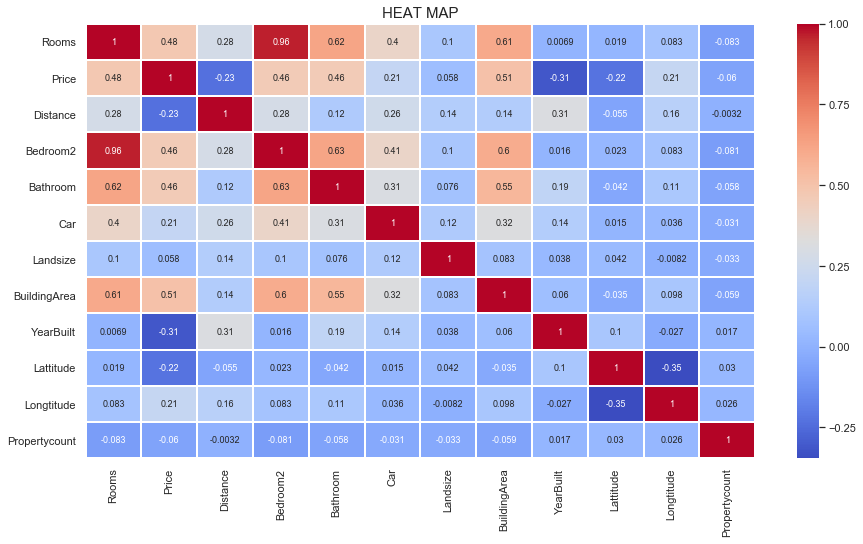

In [22]:
# plotting a heat map for all numeric variables
plt.figure(figsize=(15,8))
sns.heatmap(housing.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('HEAT MAP', fontsize=15)
plt.show()

###  1.7. Histogram Visualizations 

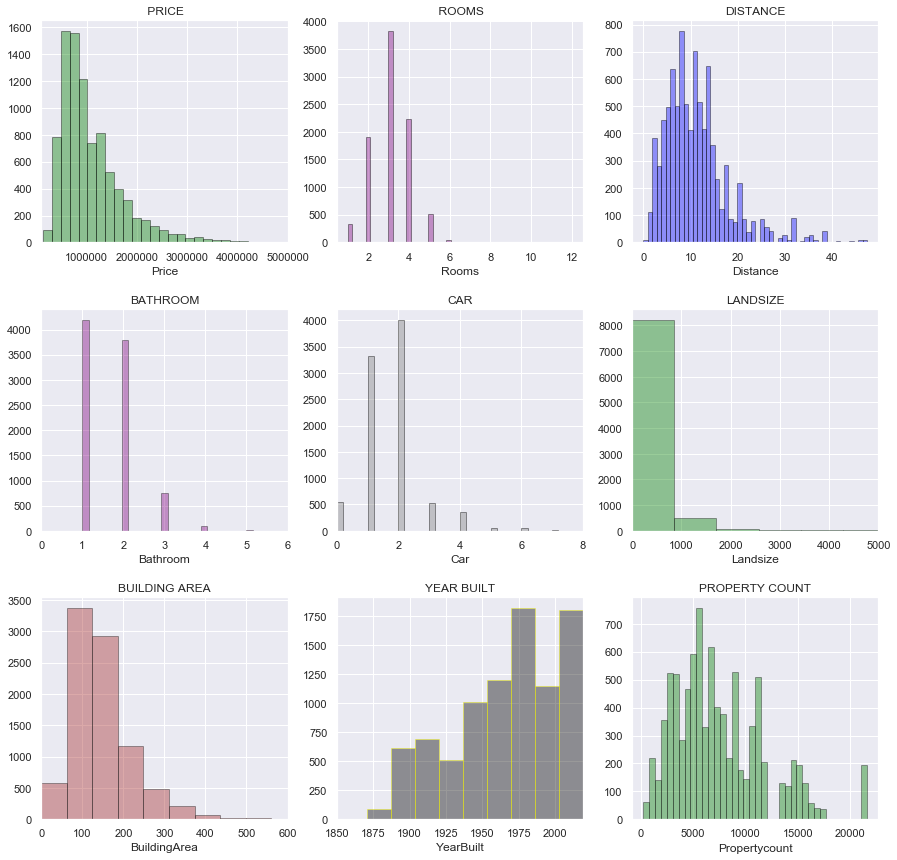

In [23]:
# Histogram for all numeric variables

sns.set_style('darkgrid')

plt.figure(figsize=(15,20))

plt.subplot(4,3,1)
sns.distplot(housing['Price'], kde = False, hist_kws=dict(edgecolor="black"), color='green').set(xlim=(100000, 5000000))
plt.title(' PRICE')

plt.subplot(4,3,2)
sns.distplot(housing['Rooms'], kde = False, hist_kws=dict(edgecolor="black"), color='purple')
plt.title(' ROOMS')

plt.subplot(4,3,3)
sns.distplot(housing['Distance'], kde = False, hist_kws=dict(edgecolor="black"), color='blue')
plt.title('DISTANCE')

plt.subplot(4,3,4)
sns.distplot(housing['Bathroom'], kde = False, hist_kws=dict(edgecolor="k"), color='purple')
plt.ylim()
plt.xlim(0,6)
plt.title('BATHROOM')

plt.subplot(4,3,5)
sns.distplot(housing['Car'], kde = False, hist_kws=dict(edgecolor="black"), color='grey')
plt.ylim()
plt.xlim(0,8)
plt.title('CAR')

plt.subplot(4,3,6)
sns.distplot(housing['Landsize'], kde = False, hist_kws=dict(edgecolor="k"), color='green')
plt.ylim()
plt.xlim(0,5000)
plt.title('LANDSIZE')

plt.subplot(4,3,7)
sns.distplot(housing['BuildingArea'], kde = False, hist_kws=dict(edgecolor="k"), color='brown')
plt.ylim()
plt.xlim(0,600)
plt.title('BUILDING AREA')

plt.subplot(4,3,8)
sns.distplot(housing['YearBuilt'], kde = False, hist_kws=dict(edgecolor="yellow"), color='black')
plt.ylim()
plt.xlim(1850,2019)
plt.title('YEAR BUILT')

plt.subplot(4,3,9)
sns.distplot(housing['Propertycount'], kde = False, hist_kws=dict(edgecolor="k"), color='green')
plt.title('PROPERTY COUNT')

plt.subplots_adjust(hspace=0.3)
plt.show()

### 1.8. Boxplot Visualizations 

C:\Users\ushai\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\ushai\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


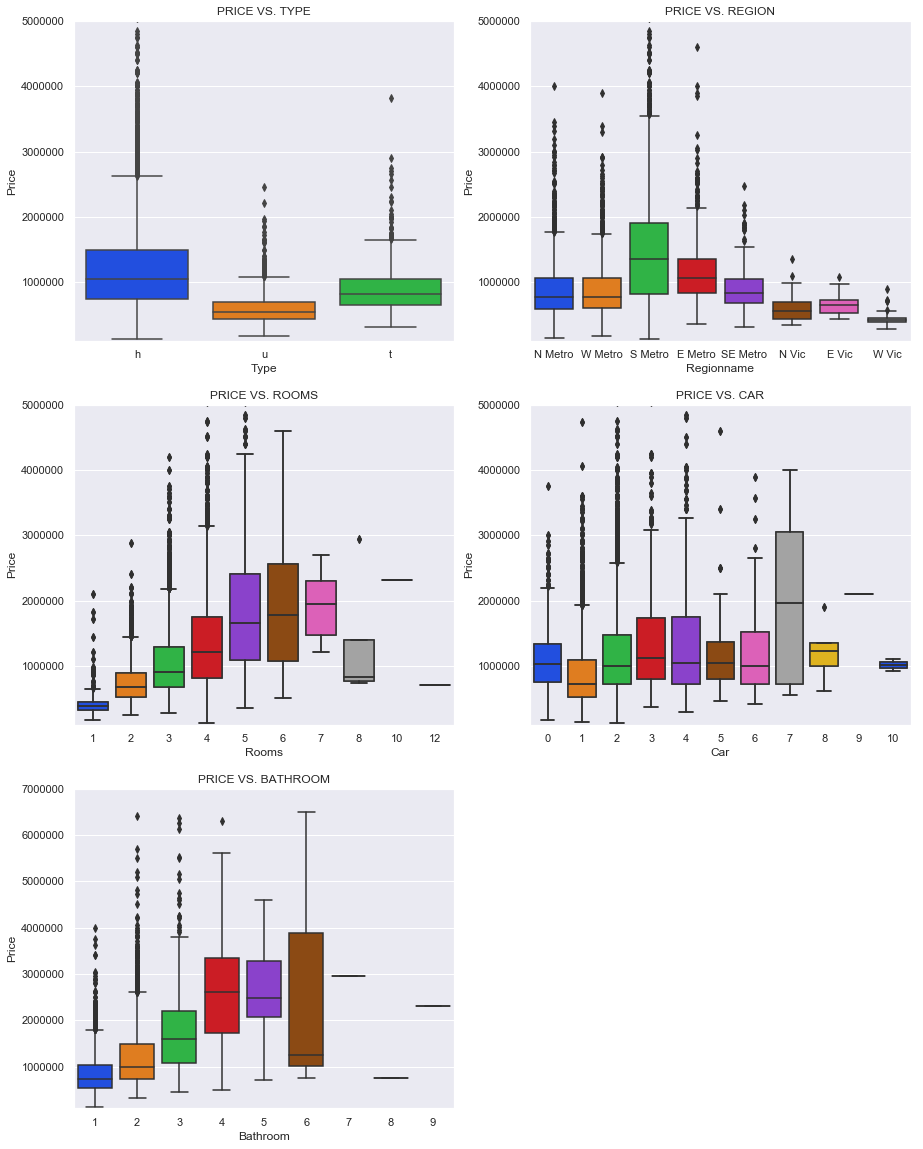

In [61]:
sns.set_style('darkgrid')

plt.figure(figsize=(15,20))

plt.subplot(3,2,1)
sns.boxplot(data=housing, x = 'Type', y='Price', palette='bright')
plt.ylim(100000,5000000)
plt.title('PRICE VS. TYPE')

plt.subplot(3,2,2)
sns.boxplot(data=housing, x = 'Regionname', y='Price', palette='bright')
plt.ylim(100000,5000000)
plt.title('PRICE VS. REGION')

plt.subplot(3,2,3)
sns.boxplot(data=housing, x = 'Rooms', y='Price', palette='bright')
plt.ylim(100000,5000000)
plt.title('PRICE VS. ROOMS')

plt.subplot(3,2,4)
sns.boxplot(data=housing, x = 'Car', y='Price', palette='bright')
plt.ylim(100000,5000000)
plt.title('PRICE VS. CAR')

plt.subplot(3,2,3)
sns.boxplot(data=housing, x = 'Rooms', y='Price', palette='bright')
plt.ylim(100000,5000000)
plt.title('PRICE VS. ROOMS')

plt.subplot(3,2,4)
sns.boxplot(data=housing, x = 'Car', y='Price', palette='bright')
plt.ylim(100000,5000000)
plt.title('PRICE VS. CAR')

plt.subplot(3,2,5)
sns.boxplot(data=housing, x = 'Bathroom', y='Price', palette='bright')
plt.ylim(100000,7000000)
plt.title('PRICE VS. BATHROOM')

plt.show()

###  2.0. Creating Dummy Variables 

In [25]:
# Getting a list of all the objects
categorical = housing.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print((i),(':'),(column.nunique()))

Suburb : 315
Address : 8764
Type : 3
Method : 5
SellerG : 250
Postcode : 194
CouncilArea : 33
Regionname : 8
year : 3
month : 12
day : 30


###  2.1. Creating Dummies

In [26]:
housing.Method.value_counts()

S     5602
SP    1292
PI    1084
VB     846
SA      63
Name: Method, dtype: int64

In [27]:
# Creating dummy variables
dummies = pd.get_dummies(housing[['Type','Postcode','Regionname','Method']])

In [28]:
housing=pd.concat([housing,dummies], axis=1)

In [29]:
housing.shape

(8887, 234)

In [30]:
# Assigning Features and Target Variables
X = housing.loc[:, ~housing.columns.isin(['Suburb', 'Price','Postcode','Method', 'CouncilArea','Bedroom2','Type'\
                                         ,'Address', 'SellerG','Date','Lattitude', 'Longtitude', 'Regionname'\
                                         ,'year','month','day','propertycount'])]

In [31]:
y = housing['Price'] 

In [32]:
X.shape

(8887, 218)

###  2.2. Preprocessing and Train Test Split

#### Preprocessing

#### Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 3.0. MACHINE LEARNING MODELS FOR PREDICTING PRICE

### 3.1. Random Forest 

In [34]:
# Running Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=250, max_depth=15)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [35]:
# Creating a list of feature names
feature_labels = X.columns

In [36]:
imp_features = rf.feature_importances_

In [37]:
imp_feat_list = pd.DataFrame(feature_labels)
imp_feat_list['Feature Importance'] = pd.Series(imp_features) * 100 
imp_feat_list = imp_feat_list.rename(columns = {0:'Variables'})
imp_feat_list = imp_feat_list.sort_values(by=["Feature Importance"], ascending=False).reset_index(drop=True)

In [38]:
imp_feat_list.head(20)

,Variables,Feature Importance
0,BuildingArea,36.183758
1,Regionname_S Metro,17.076016
2,YearBuilt,12.440083
3,Distance,10.415578
4,Landsize,7.004804
5,Rooms,2.107827
6,Regionname_E Metro,1.872989
7,Bathroom,1.834007
8,Propertycount,1.734868
9,Car,0.962862


<Figure size 720x720 with 0 Axes>

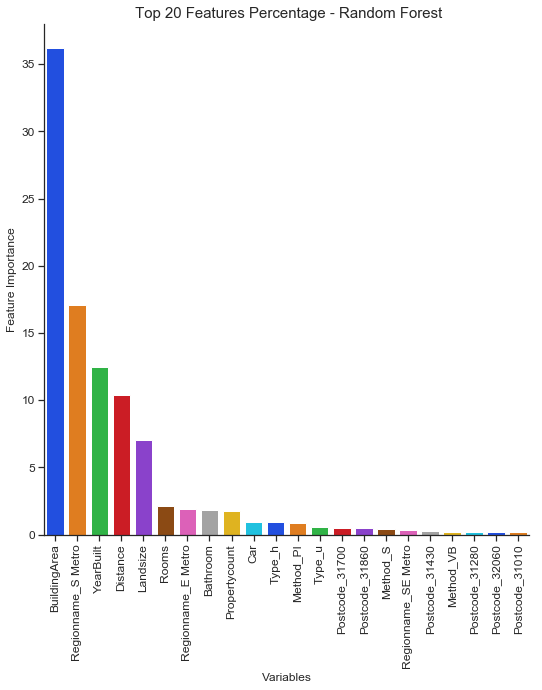

In [39]:
# Highest 10 values for Coefficents
highest = imp_feat_list.nlargest(22, 'Feature Importance')

plt.figure(figsize=(10,10))
sns.set(style="ticks")

g = sns.catplot(x='Variables', y='Feature Importance', data=highest,
                   height=8, kind="bar", palette="bright", legend=False)
g.set_xlabels(fontsize=12)
g.set_ylabels(fontsize=12)
g.set_xticklabels(rotation=90, fontsize=12)
g.set_yticklabels(fontsize=12)
plt.title(' Top 20 Features Percentage - Random Forest',fontsize=15)
plt.show()

#### 3.1.a. Importing SelectFromModel and setting up threshold

In [40]:
from sklearn.feature_selection import SelectFromModel

# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.000877

sfm = SelectFromModel(rf, threshold=0.000854)

In [41]:
# Train the selector, feeding origonal variables
sfm.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=0.000854)

In [42]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feature_labels[feature_list_index])

Rooms
Distance
Bathroom
Car
Landsize
BuildingArea
YearBuilt
Propertycount
Type_h
Type_u
Postcode_30160
Postcode_30520
Postcode_30540
Postcode_31010
Postcode_31260
Postcode_31280
Postcode_31430
Postcode_31440
Postcode_31700
Postcode_31860
Postcode_31880
Postcode_31950
Postcode_32060
Regionname_E Metro
Regionname_S Metro
Regionname_SE Metro
Method_PI
Method_S
Method_SA
Method_SP
Method_VB


#### 3.1.b. Transforming Features

In [43]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_imp_rf_train = sfm.transform(X_train)
X_imp_rf_test = sfm.transform(X_test)

#### 3.1.c. Creating a new RandomForestRegressor based on transformed features

In [44]:
# Creating a new random forest classifier for the most important features
rf_imp = RandomForestRegressor(n_estimators=250, max_depth=15)

# Train the new classifier on the new dataset containing the most important features
rf_imp.fit(X_imp_rf_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### 4.0. RANDOM FOREST ACCURACY COMPARISON

#### 4.1. Regular Features

In [45]:
from sklearn.metrics import accuracy_score

# Apply The Full Featured Classifier To The Training Data
y_pred_train = rf.predict(X_train)

# Apply The Full Featured Classifier To The Test Data
y_pred_test = rf.predict(X_test)

In [46]:
from sklearn import metrics
print('Regular Model R² Train Data:', rf.score(X_train,y_train))
print('Regular Model R² Test Data:', rf.score(X_test,y_test))

# Predictions based on Test data
print ('-------------------------------------------------')
print ("Test Data")
print ("Mean Absolute Error: {}".format(metrics.mean_absolute_error(y_test, y_pred_test)))
print ("Mean Squared Error: {}".format(metrics.mean_squared_error(y_test, y_pred_test)))
print ("Root Mean Squared Error: {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))))

Regular Model R² Train Data: 0.9678486476480471
Regular Model R² Test Data: 0.8136696040368504
-------------------------------------------------
Test Data
Mean Absolute Error: 168706.41574280927
Mean Squared Error: 91906858503.42593
Root Mean Squared Error: 303161.4396710537


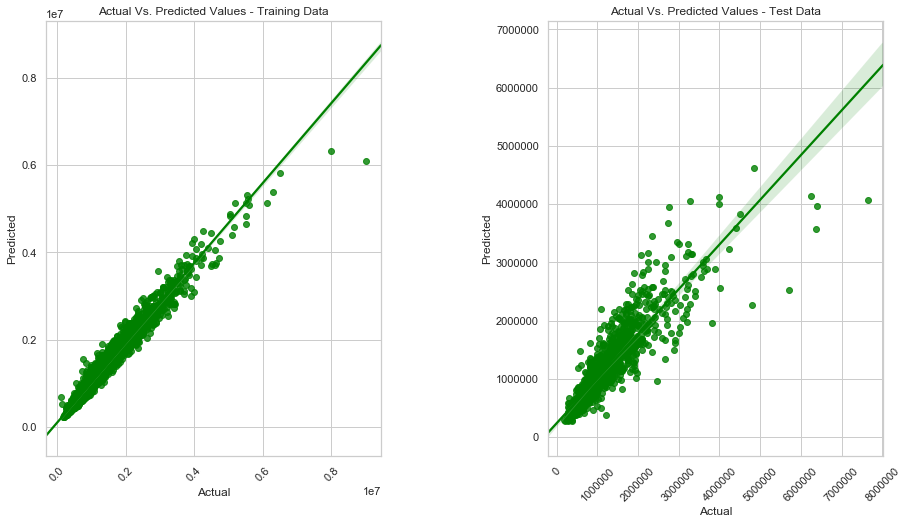

In [47]:
# Training Data with regular features

sns.set(style="whitegrid")

plt.figure(figsize=(15, 8))

plt.subplot(1,2,1)
sns.regplot(y_train, y_pred_train, color='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xticks(rotation=45)
plt.title('Actual Vs. Predicted Values - Training Data')

# Test Data with regular features
plt.subplot(1,2,2)
sns.regplot(y_test, y_pred_test, color='green')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xticks(rotation=45)
plt.title('Actual Vs. Predicted Values - Test Data')

plt.subplots_adjust(wspace= .5)
plt.show()

### 4.2. Selected Features

In [48]:
# Apply The Full Featured Classifier To The Training Data
y_imp_pred_train = rf_imp.predict(X_imp_rf_train)

# Apply The Full Featured Classifier To The Test Data
y_imp_pred_test = rf_imp.predict(X_imp_rf_test)

print('Updated Model R² Train Data:', rf_imp.score(X_imp_rf_train, y_train))
print('Updated Model R² Test Data:', rf_imp.score(X_imp_rf_test, y_test))

# Based on Test Data
print ('-------------------------------------------------')
print ('Test Data')
print ("Mean Absolute Error: {}".format(metrics.mean_absolute_error(y_test, y_imp_pred_test)))
print ("Mean Squared Error: {}".format(metrics.mean_squared_error(y_test, y_imp_pred_test)))
print ("Root Mean Squared Error: {}".format(np.sqrt(metrics.mean_squared_error(y_test, y_imp_pred_test))))

Updated Model R² Train Data: 0.9685284555266833
Updated Model R² Test Data: 0.8116709903073409
-------------------------------------------------
Test Data
Mean Absolute Error: 170228.2604096187
Mean Squared Error: 92892668189.98595
Root Mean Squared Error: 304782.98540106526


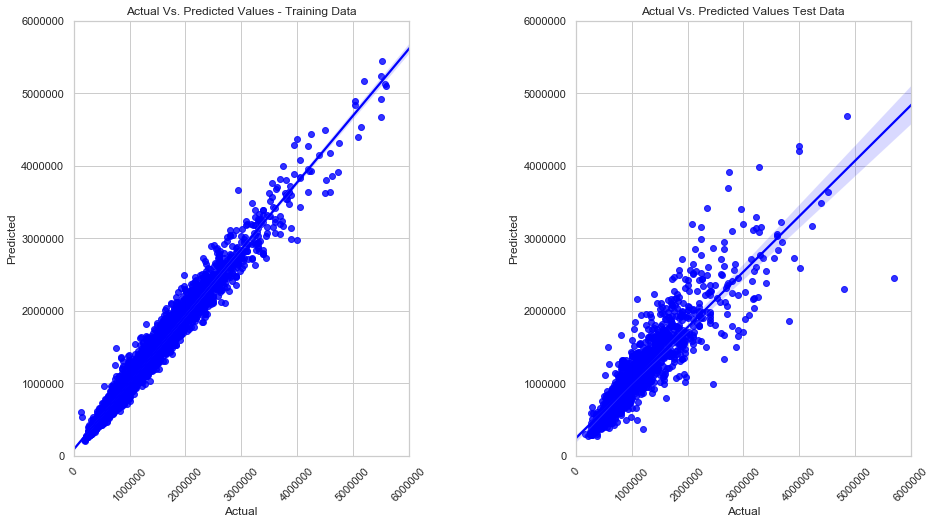

In [49]:
# Training Data with updated features
sns.set(style="whitegrid")

plt.figure(figsize=(15, 8))

plt.subplot(1,2,1)
sns.regplot(y_train, y_imp_pred_train, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xticks(rotation=45)
plt.ylim(0,6000000)
plt.xlim(0,6000000)
plt.title('Actual Vs. Predicted Values - Training Data')

# Test Data with updated features
plt.subplot(1,2,2)
sns.regplot(y_test, y_imp_pred_test, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xticks(rotation=45)
plt.ylim(0,6000000)
plt.xlim(0,6000000)
plt.title('Actual Vs. Predicted Values Test Data')

plt.subplots_adjust(wspace= .5)
plt.show()


## 5.0. Linear Regression with Limited Features

In [50]:
# list(imp_feat_list['Variables'])

In [51]:
# Using top 20 features from Random Forest Feature Selection
# XX = housing[list(imp_feat_list.head(20).Variables)]

In [52]:
XX = housing[['YearBuilt', 
              'Landsize', 
              'Bathroom', 
              'Rooms', 
              'Distance', 
              'Type_h',
              'Type_t',
              'Type_u', 
              'Car',
              'Regionname_E Metro',
              'Regionname_S Metro',
              'Regionname_SE Metro',
              'Regionname_W Metro',
              'Regionname_N Vic',
              'Regionname_E Vic',
              'Regionname_W Vic',]] 

In [53]:
yy = housing['Price']

In [54]:
from sklearn.model_selection import train_test_split
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.2, random_state=0)

### 5.1. Linear Regression Accuracy

In [55]:
from sklearn.linear_model import LinearRegression
XX_reg = LinearRegression()
XX_reg.fit(XX_train, yy_train)

# Prediction on training data
yy_pred_train = XX_reg.predict(XX_train)

# Prediction on testing data
yy_pred_test = XX_reg.predict(XX_test)

print('Training set R²:',XX_reg.score(XX_train, yy_train))
print('Testing set R²:',XX_reg.score(XX_test, yy_test))

# Predictions based on Test data
print ('-------------------------------------------------')
print ('Test Data')
print ("Mean Absolute Error: {}".format(metrics.mean_absolute_error(yy_test, yy_pred_test)))
print ("Mean Squared Error: {}".format(metrics.mean_squared_error(yy_test, yy_pred_test)))
print ("Root Mean Squared Error: {}".format(np.sqrt(metrics.mean_squared_error(yy_test, yy_pred_test))))

Training set R²: 0.6202410353433015
Testing set R²: 0.6068245415946456
-------------------------------------------------
Test Data
Mean Absolute Error: 279719.61707274447
Mean Squared Error: 193932509164.13565
Root Mean Squared Error: 440377.6892215768


In [56]:
print(XX_reg.intercept_)
print(XX_reg.coef_)

5985283.6309728185
[-2.94590963e+03  2.45945115e+01  2.33409021e+05  1.72711993e+05
 -3.94511591e+04  2.07884320e+05  7.62311652e+03 -2.15507436e+05
  5.12593541e+04  2.48955732e+05  5.26268528e+05  4.63700727e+05
 -5.45979988e+04  3.31481918e+05  5.96619125e+05  1.71434528e+05]


### 5.2. Coefficent Values

In [57]:
# Coefficent Values for linear regression
feature_imp = XX_reg.coef_

# Creating dataframe for Coefficients
coeff_XX_reg = pd.DataFrame(XX.columns)
coeff_XX_reg['Coefficient Estimate'] = pd.Series(XX_reg.coef_)

# Renaming "single Column"
coeff_XX_reg = coeff_XX_reg.rename(columns = {0:'Variables'})

# sorting values by 'Coefficient Estimate'
coeff_XX_reg = coeff_XX_reg.sort_values(by=['Coefficient Estimate'],ascending=False).reset_index(drop=True)

In [58]:
coeff_XX_reg

,Variables,Coefficient Estimate
0,Regionname_E Vic,596619.124946
1,Regionname_S Metro,526268.527683
2,Regionname_SE Metro,463700.727390
3,Regionname_N Vic,331481.918438
4,Regionname_E Metro,248955.731742
5,Bathroom,233409.021030
6,Type_h,207884.319893
7,Rooms,172711.992977
8,Regionname_W Vic,171434.528418
9,Car,51259.354077


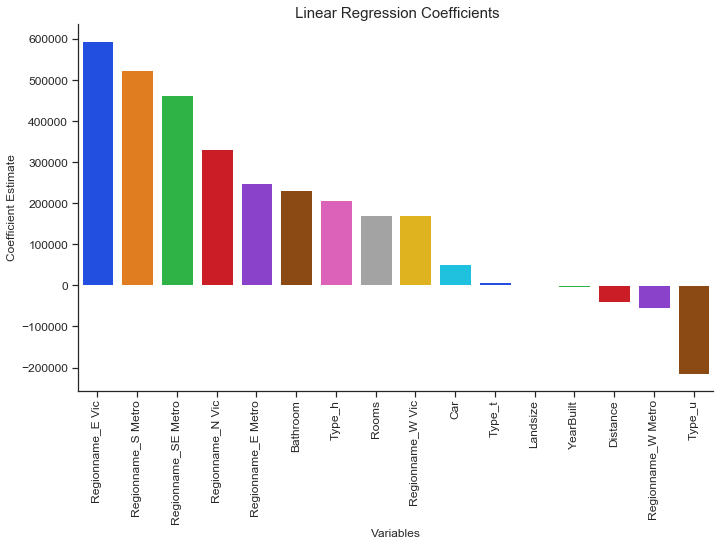

In [59]:
# Coefficent Values for Linear Regression
highest = coeff_XX_reg.nlargest(100, 'Coefficient Estimate')

sns.set(style="ticks")
g = sns.catplot(x='Variables', y='Coefficient Estimate', data=highest,
                   height=6, aspect=1.7, kind="bar", palette="bright", legend=False)
g.set_xlabels(fontsize=12)
g.set_ylabels(fontsize=12)
g.set_xticklabels(rotation=90, fontsize=12)
g.set_yticklabels(fontsize=12)
plt.title(' Linear Regression Coefficients',fontsize=15)
plt.show()

### 5.3. Scatter Plot Actual Vs. Predicted Values

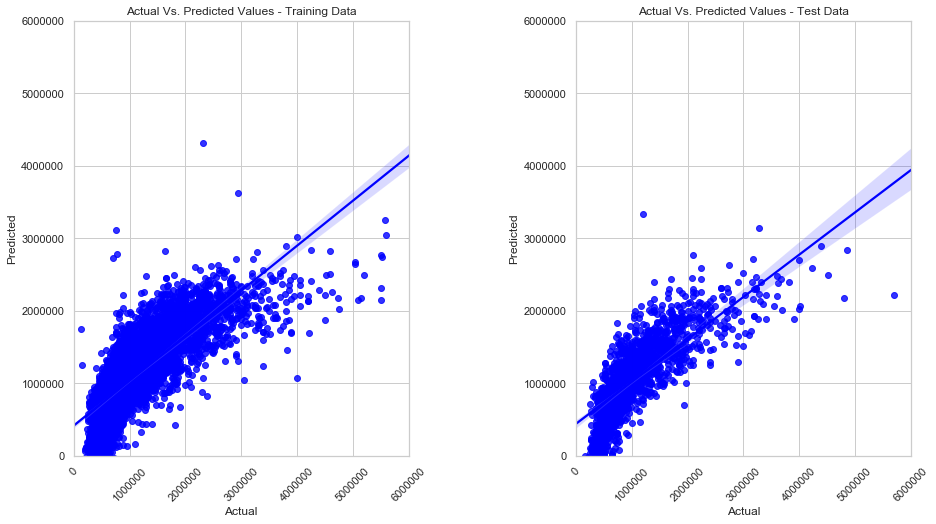

In [60]:
# Scatter plot of Actual Vs. Predicted values for linear regression R Square: 0.6707
sns.set(style="whitegrid")

plt.figure(figsize=(15, 8))

plt.subplot(1,2,1)
sns.regplot(yy_train, yy_pred_train, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.ylim(0,6000000)
plt.xlim(0,6000000)
plt.xticks(rotation=45)
plt.title('Actual Vs. Predicted Values - Training Data')


# Scatter plot of Actual Vs. Predicted values for linear regression R Square: 0.6707

plt.subplot(1,2,2)
sns.regplot(yy_test, yy_pred_test, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xticks(rotation=45)
plt.ylim(0,6000000)
plt.xlim(0,6000000)
plt.title('Actual Vs. Predicted Values - Test Data')
plt.subplots_adjust(wspace= .5)
plt.show()

#### Other options
1. Try k fold cross validation
2. Try boosting models